In [29]:
import pandas as pd
from pandas_profiling import ProfileReport
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("final_clean_df.csv",index_col=0)

In [31]:
df

Genre                 Title        Artist  Explicit  Length Scale  \
0        rock        into the storm        Gojira     False    5.02     D   
1        rock  the sound of silence     Disturbed     False    4.08    F#   
2        rock              amazonia        Gojira     False    5.00     A   
3        rock         back in black         AC/DC     False    4.15     A   
4        rock         another world        Gojira     False    4.24     G   
...       ...                   ...           ...       ...     ...   ...   
11394  hiphop       higher learning   Young Jeezy      True    3.44    G#   
11395  hiphop         its goin down     Celly Cel     False    5.24    F#   
11398  hiphop           let me know       Cam'Ron      True    4.14    F#   
11401  hiphop                  beta   Tyson James     False    3.54     G   
11402  hiphop        can't truss it  Public Enemy      True    5.21     B   

         Key  BPM  Danceability  Positiveness  Liveness  Energy  speechness  \
0      Major  106            25            11        13      97           7   
1      Minor   86            32            18        10      28           3   
2      Major  182            38            51        24      95           4   
3      Major  188            31            76         8      70           5   
4      Minor  170            35            24        12      88           4   
...      ...  ...           ...           ...       ...     ...         ...   
11394  Minor   77            71            90        11      65          25   
11395  Minor   75            82            78         4      50          23   
11398  Major   92            75            69        35      79          33   
11401  Major   89            73            58        28      57          45   
11402  Major  102            80            61        13      87          14   

      KeyScaled                                             Lyrics  
0             D  go say something about awakening the rebellion...  
1           F#m  hello darkness my old friend ive come to talk ...  
2             A  incite a riot put yourself in a trance you rot...  
3             A  back in black i hit the sack ive been too long...  
4            Gm  we mock and slaughter all the purest kinds bli...  
...         ...                                                ...  
11394       G#m  i need some weed man somebody call the weed ma...  
11395       F#m  its goin down tonight you know i gots to go ge...  
11398        F#  all my harlem niggas my bk niggas back uptown ...  
11401         G  verse topher oh boy catch me walking through y...  
11402         B  confusion here come the drums alright alright ...  

[8766 rows x 15 columns]

d:\idan\python\genre_prediction_data_science\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

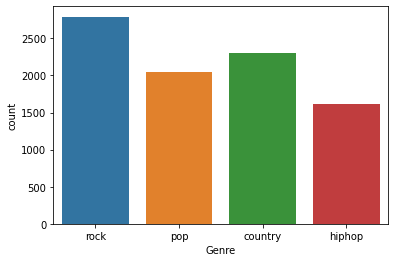

In [32]:
sns.countplot(df['Genre'])

In [33]:
profile_df = ProfileReport(df, title='Pandas Profiling Report')
profile_df

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.stem import LancasterStemmer
nltk.download('stopwords')
nltk.download('punkt')
lancaster=LancasterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\idan9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\idan9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lancaster.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [36]:
genres=df.Genre.drop_duplicates().values.tolist()
customStopWords = ["'s","im", "n't", "'m", "'re", "'ll","'ve","...", "ä±", "''", '``',\
                  '--',',', "'d", 'el', 'la', 'chorus','know', 'verse', 'oh', 'la', 'ya', 'na', 'wo', 'wan', 'Chorus', 'Verse',
                  'ca', 'cuz', '[Verse 1:]', 'got','[Intro:]', '[Chorus]', '\n', 's', 't', 'n', 'don',
                  'ya','aah','ye','hey','ba','da','buh',"like","get","love",'duh','doo','oh','ooh','woo','uh','hoo','ah','yeah',
                   'oo','la','chorus','beep','ha', "get'", "like'"]
stopWords = stopwords.words('english') + customStopWords
for genre in genres:
    print(f"Words visual for {genre}: \n")
    words = " ".join(df[df["Genre"]==genre]["Lyrics"])
    wc= WordCloud(background_color="white", random_state=1,stopwords=stopWords, max_words = 500, width =800, height = 1500)
    wc.generate(words)
    plt.figure(figsize=[10,10])
    plt.imshow(wc,interpolation="bilinear")
    plt.axis('off')
    plt.show()
    print("------------")


Words visual for rock: 



TypeError: sequence item 1978: expected str instance, float found